In [1]:
import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

from nltk import word_tokenize
from nltk.corpus import stopwords

import unidecode

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score
import re

In [2]:
df = pd.read_csv("Data_cars.csv")

In [3]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [4]:
df['Description'].head()[4]

"modele: TIPO 2 SW, version: II SW 1.4 95 POP, puissance_fiscale: 5, portes: 5.0, options: Volant alu & cuir;Bluetooth inclut musique en streaming, connexion téléphone;Rétroviseurs extérieurs chauffants;Roue de secours de taille normale;Antibrouillards avant;Taille écran multi-fonctions 5 pouces;Antipatinage;Indicateur de sous-gonflage des pneus;Ouverture du coffre à distance;6 airbags;6 haut-parleurs;Air conditionné manuel;Rétroviseurs extérieurs réglage électrique;Réglage du volant en hauteur, en profondeur;ESP;Airbags rideaux;Airbags latéraux;Aide au démarrage en côte;Ordinateur de bord;ABS;Volant multi-fonction;Assistance au freinage d'urgence;Bluetooth;Ampoules de phares halogènes, couleur: blanc verni"

In [5]:
# puissance_fiscale 
# portes 
# couleur
# description plus 

In [6]:
# convert date to string

In [7]:
df['Online'] = pd.to_datetime(df['Online'], format='%d/%m/%Y à %Hh%M', errors='ignore')

In [8]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,2018-07-06 03:47:00,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,2018-04-03 16:41:00,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,2018-07-30 01:55:00,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,2018-07-09 14:12:00,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,2018-05-19 03:52:00,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [9]:
len(df)

166695

In [10]:
#converts column string to int
# first we need to extract the number of the column and remove km at the end
df['Mileage'] = df['Mileage'].str.extract(r'(\d{1,9})')

In [11]:
df['Mileage'] = pd.to_numeric(df['Mileage']) 

In [12]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,2018-07-06 03:47:00,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,2018-04-03 16:41:00,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,2018-07-30 01:55:00,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,2018-07-09 14:12:00,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,2018-05-19 03:52:00,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [13]:
d = {'puissance_fiscale':[],
    'portes':[], 
     'version':[],
     'couleur':[], 
     'options':[]
    }


for x in df['Description']:
    match = re.search(r"puissance_fiscale:(.*?),", x)
    # converts string to int 
    d['puissance_fiscale'].append(int(match.group(1)))
    
    
    match = re.search(r'version:(.*?),', x)
    d['version'].append(match.group(1))
    
    match = re.search(r"portes:(.*?),", x)
    #converts string to int
    
    try:
        d['portes'].append(float(match.group(1).strip()))
        
    except: 
        d['portes'].append(None)
        
    match = re.search(r"couleur:(?P<name>[A-Za-z\t .]+)", x)
    d['couleur'].append(match.group(1))

    match = re.search(r"options:(.*?),", x)
    d['options'].append(match.group(1))

In [14]:
len(d['portes'])

166695

In [15]:
len(d['options'])

166695

In [16]:
d['couleur'] = [x.lower() for x in d['couleur']]

In [17]:
df1 = pd.DataFrame(d, columns=['puissance_fiscale', 'portes', 'version','couleur', 'options'])

In [18]:
df1.head()

,puissance_fiscale,portes,version,couleur,options
0,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...
1,16,5.0,(F16) XDRIVE30D 258 M SPORT BVA8,carbonschwarz metallise,triangle de presignalisation et trousse de pr...
2,47,5.0,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,noir panthere cristal,banquette arrière 3 places;écran tactile;témo...
3,5,3.0,1.3 70 FUN,jaune,direction assistée;jantes alu;rétroviseurs él...
4,5,5.0,II SW 1.4 95 POP,blanc verni,Volant alu & cuir;Bluetooth inclut musique en...


In [19]:
df = pd.concat([df, df1], axis=1, sort=False)

In [20]:
df = df.drop('Description', axis=1)

In [21]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,puissance_fiscale,portes,version,couleur,options
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,2018-07-06 03:47:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,2018-04-03 16:41:00,16,5.0,(F16) XDRIVE30D 258 M SPORT BVA8,carbonschwarz metallise,triangle de presignalisation et trousse de pr...
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,2018-07-30 01:55:00,47,5.0,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,noir panthere cristal,banquette arrière 3 places;écran tactile;témo...
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,2018-07-09 14:12:00,5,3.0,1.3 70 FUN,jaune,direction assistée;jantes alu;rétroviseurs él...
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,2018-05-19 03:52:00,5,5.0,II SW 1.4 95 POP,blanc verni,Volant alu & cuir;Bluetooth inclut musique en...


In [22]:
df.dtypes

Price                       float64
Make                         object
Model                        object
Model_year                    int64
Mileage                       int64
Fuel                         object
Gearbox                      object
Online               datetime64[ns]
puissance_fiscale             int64
portes                      float64
version                      object
couleur                      object
options                      object
dtype: object

In [23]:
#corpus
df['Online'].iloc[1].year

2018

In [24]:
d = {'age':[]}

for x in range(len(df)):
        
    date = df['Online'].iloc[x].year - df['Model_year'].iloc[x] 

    d['age'].append(date)


In [25]:
df1 = pd.DataFrame(d, columns=['age'])

In [26]:
df1.head()

,age
0,4
1,3
2,4
3,11
4,0


In [27]:
df = pd.concat([df, df1], axis=1, sort=False)

In [28]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,puissance_fiscale,portes,version,couleur,options,age
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,2018-07-06 03:47:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...,4
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,2018-04-03 16:41:00,16,5.0,(F16) XDRIVE30D 258 M SPORT BVA8,carbonschwarz metallise,triangle de presignalisation et trousse de pr...,3
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,2018-07-30 01:55:00,47,5.0,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,noir panthere cristal,banquette arrière 3 places;écran tactile;témo...,4
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,2018-07-09 14:12:00,5,3.0,1.3 70 FUN,jaune,direction assistée;jantes alu;rétroviseurs él...,11
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,2018-05-19 03:52:00,5,5.0,II SW 1.4 95 POP,blanc verni,Volant alu & cuir;Bluetooth inclut musique en...,0


In [29]:
df.corr()

,Price,Model_year,Mileage,puissance_fiscale,portes,age
Price,1.000000,0.090045,-0.300817,0.478772,-0.156319,-0.090045
Model_year,0.090045,1.000000,-0.318938,-0.049888,0.116777,-1.000000
Mileage,-0.300817,-0.318938,1.000000,0.063511,-0.095343,0.318938
puissance_fiscale,0.478772,-0.049888,0.063511,1.000000,-0.272947,0.049888
portes,-0.156319,0.116777,-0.095343,-0.272947,1.000000,-0.116777
age,-0.090045,-1.000000,0.318938,0.049888,-0.116777,1.000000


In [30]:
df['options'][0]

" banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur régl

In [31]:
len(df)

166695

In [32]:
d = {
    'cylindre': [], 
     'chevaux': []
    }

i = 0
for x in df['version']:
    try: 
        
        match = re.search(r'[+-]?(\d+(\.\d*)|\.\d+)([eE][+-]?\d+)?', x)
        d['cylindre'].append(float(match.group(1)))
        
        #df['version'].iloc[i] = x.replace(match.group(1), '')
    
    except: 
        d['cylindre'].append(None)
        
    try: 
        
        match = re.findall(r'([0-9]{2,3})', x)
        temp = [int (n) for n in match]
        d['chevaux'].append(max(temp))
        
    except: 
        
        d['chevaux'].append(None)
        
    i = i + 1
        
        


In [33]:
cylindre_chevaux = pd.DataFrame(data=d)

In [34]:
cylindre_chevaux.head()

,cylindre,chevaux
0,1.6,92.0
1,NaN,258.0
2,4.0,560.0
3,1.3,70.0
4,1.4,95.0


In [35]:
cylindre_chevaux.isna().sum() 

cylindre    30102
chevaux      6219
dtype: int64

In [36]:
df = pd.concat([df, cylindre_chevaux], axis=1, sort=False)

In [37]:
df[df['couleur'].isnull()].count()

Price                0
Make                 0
Model                0
Model_year           0
Mileage              0
Fuel                 0
Gearbox              0
Online               0
puissance_fiscale    0
portes               0
version              0
couleur              0
options              0
age                  0
cylindre             0
chevaux              0
dtype: int64

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
cylindre_chevaux_copy = cylindre_chevaux.dropna()
cylindre_chevaux_copy.head()

,cylindre,chevaux
0,1.6,92.0
2,4.0,560.0
3,1.3,70.0
4,1.4,95.0
6,2.0,140.0


In [40]:
# predict chevaux 
X = cylindre_chevaux_copy[['cylindre']]
y = cylindre_chevaux_copy[['chevaux']]

In [41]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.1527766595231419

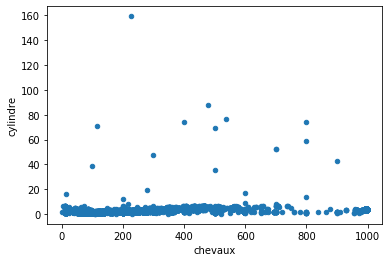

In [42]:
%matplotlib inline
# in order predict correclyt we need to remove the outliers. In the exemple above we see that all cylindre bigger then 20 are considered outlisers meaning they don't follow a particular trend.
# there might have been a mistake in the regex. Let's see how many lines outliers is there. 
cylindre_chevaux.plot.scatter(x='chevaux', y='cylindre')

In [43]:
cylindre_chevaux.head()

,cylindre,chevaux
0,1.6,92.0
1,NaN,258.0
2,4.0,560.0
3,1.3,70.0
4,1.4,95.0


In [44]:
# based on the graph above we can consider that the cylindre size above 15 are outliers. we can remove them from the actual datalist

cylindre_chevaux_copy = cylindre_chevaux.dropna()
cylindre_chevaux_copy[cylindre_chevaux_copy['cylindre']> 15].count()

# we see that there are 17 outliers. beceause the numbre is small we can remove then from the list 

cylindre    17
chevaux     17
dtype: int64

In [45]:
cylindre_chevaux_copy = cylindre_chevaux_copy[cylindre_chevaux_copy['cylindre']< 15]

In [46]:
# après avoir fair tourner le modèle 
# map 
# sans la column options et avec. On fait faire des dummies. fuel, options plus de 10 000  valeurs un traitement NLP transofrmer ce texte en une matrice on va faire la mm chose pour le chant option. transformer dans un input du modèles comme si c'était en mesurant la performant
# le traitement des column vectoriser
# scraper un catalogue des véhicules neufs ajouter ces prix
# une distance entre les chaines de characteres

In [47]:
cylindre_chevaux_copy.corr()
# now we can see that there is a clear correlation between cylindre and chevaux 

,cylindre,chevaux
cylindre,1.00000,0.65764
chevaux,0.65764,1.00000


In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline
        

def predictLinear(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    
    return regr

Coefficients: 
 [[108.55092917]]
Mean squared error: 3386.55
Coefficient of determination: 0.42


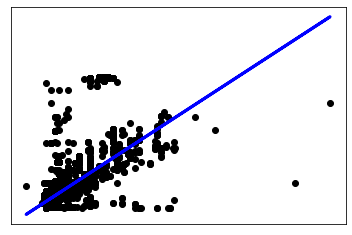

In [49]:
regr = predictLinear(cylindre_chevaux_copy[['cylindre']],cylindre_chevaux_copy[['chevaux']])

In [50]:
temp = cylindre_chevaux[cylindre_chevaux.isnull().any(axis=1)]

In [51]:
cylindre = temp[temp['chevaux'].isna()]['cylindre'].dropna()

In [52]:
pred_chevaux = regr.predict(cylindre.values.reshape(-1, 1))

In [53]:
pred = np.reshape(pred_chevaux, len(cylindre))

In [54]:
temp = pd.DataFrame(data={'cylindre':cylindre, 'chevaux':pred})

In [55]:
temp.tail()

,cylindre,chevaux
166526,5.0,495.795261
166578,1.5,115.867009
166633,1.0,61.591544
166650,2.0,170.142473
166653,2.9,267.838310


In [56]:

df['chevaux'] = df['chevaux'].fillna(temp['chevaux'])

In [57]:
df.iloc[166650:]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,puissance_fiscale,portes,version,couleur,options,age,cylindre,chevaux
166650,2520.0,CITROEN,PICASSO,2004,243593,Diesel,mécanique,2018-10-20 05:18:00,5,5.0,2.0 HDI PACK,violet,jantes alu;vitres électriques;indicateur temp...,14,2.0,170.142473
166651,17918.0,PEUGEOT,2008,2017,9829,Diesel,mécanique,2018-05-08 05:52:00,5,5.0,(2) 1.6 BLUEHDI 100 STYLE,peinture metallisee gris artense,pack urbain;régulateur limiteur de vitesse;ca...,1,1.6,100.000000
166652,10669.0,CITROEN,C4 PICASSO,2012,90310,Diesel,mécanique,2018-03-24 03:52:00,6,5.0,(2) 1.6 HDI 110 FAP MILLENIUM BVM6,gris fonc,radar de recul;sièges arrière coulissants;vol...,6,1.6,110.000000
166653,6008.0,HYUNDAI,TERRACAN,2003,150497,Diesel,automatique,2018-06-01 00:50:00,11,5.0,2.9 CRDI PACK LUXE BVA,vert,direction assistée;airbag frontal;jantes alu;...,15,2.9,267.838310
166654,18170.0,MERCEDES,CLASSE A,2014,52525,Diesel,mécanique,2018-02-07 00:29:00,5,5.0,III 180 CDI SENSATION,gris clair metal,banquette arrière 3 places;volant cuir;régula...,4,NaN,180.000000
166655,7918.0,PEUGEOT,308,2009,105023,Diesel,automatique,2018-03-05 04:19:00,6,5.0,1.6 HDI 112 FAP PREMIUM PACK BMP6 5P,gris shark,radar de recul;régulateur limiteur de vitesse...,9,1.6,112.000000
166656,6929.0,RENAULT,CLIO,2013,48569,Essence,mécanique,2018-05-22 22:44:00,5,5.0,1.2 16V 75 COLLECTION ALIZE 5P,noir,banquette arrière 3 places;régulateur limiteu...,5,1.2,75.000000
166657,14034.0,PEUGEOT,508,2015,75937,Diesel,mécanique,2018-06-22 22:17:00,6,5.0,(2) SW 1.6 BLUEHDI 120 BUSINESS PACK,noir,GPS;jantes alu;5 places;aide parking;feux aut...,3,1.6,120.000000
166658,18484.0,OPEL,MOKKA X,2017,22306,Diesel,mécanique,2018-04-18 03:27:00,7,5.0,1.6 CDTI 136 4X2 INNOVATION,blanc,5 places;carnet d'entretien;pack électrique;s...,1,1.6,136.000000
166659,12964.0,RENAULT,CLIO,2016,15231,Essence,mécanique,2018-01-20 16:17:00,5,5.0,IV 0.9 TCE 90 ENERGY INTENS,noir etoile,banquette arrière 3 places;écran tactile;rada...,2,0.9,90.000000


In [58]:
#fuzzy wuzzy - modèle pour caculer les distances entres le mots 

In [59]:
#Normalizer - count vectorizer - DataFrame Mapper

Coefficients: 
 [[0.00401116]]
Mean squared error: 0.13
Coefficient of determination: 0.43


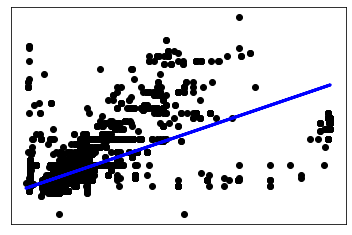

In [60]:
regr = predictLinear(cylindre_chevaux_copy[['chevaux']], cylindre_chevaux_copy[['cylindre']])

In [61]:
temp = cylindre_chevaux[cylindre_chevaux.isnull().any(axis=1)]

In [62]:
chevaux = temp[temp['cylindre'].isna()]['chevaux'].dropna()

In [63]:
pred_cylindre = regr.predict(chevaux.values.reshape(-1, 1))
pred_cylindre

array([[2.12025663],
       [2.34087039],
       [1.90766519],
       ...,
       [1.36214752],
       [1.5907836 ],
       [1.27791317]])

In [64]:
pred = np.reshape(pred_cylindre, len(chevaux))

In [65]:
temp = pd.DataFrame(data={'chevaux':chevaux, 'cylindre':pred})

In [66]:
temp.tail()

,chevaux,cylindre
166654,180.0,1.807386
166666,110.0,1.526605
166668,69.0,1.362148
166676,126.0,1.590784
166684,48.0,1.277913


In [67]:
df['cylindre'] = df['cylindre'].fillna(temp['cylindre'])

In [68]:
df.iloc[166684:]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,puissance_fiscale,portes,version,couleur,options,age,cylindre,chevaux
166684,37232.0,BMW,X1,2018,3,Diesel,mécanique,2018-05-07 22:33:00,6,5.0,(F48) SDRIVE16D M SPORT,blanc,intérieur : alcantara;FAP;roues motrices : 2,0,1.277913,48.0
166685,12540.0,RENAULT,CLIO,2016,22022,Diesel,mécanique,2018-01-26 13:48:00,4,5.0,IV 1.5 DCI 90 ENERGY INTENS E6,gris clair metal,"""écran tactile;radar de recul;volant cuir;rég...",2,1.500000,90.0
166686,10438.0,VOLKSWAGEN,GOLF,2013,47472,Essence,mécanique,2018-07-07 05:28:00,5,3.0,VII 1.2 TSI 85 BLUEMOTION TECHNOLOGY TRENDLIN...,noir,5 places;roues motrices : 2,5,1.200000,85.0
166687,13068.0,RENAULT,CLIO,2017,20253,Diesel,mécanique,2018-09-14 22:15:00,4,5.0,IV 1.5 DCI 90 ENERGY BUSINESS ECO2 82G,blanc,,1,1.500000,90.0
166688,11122.0,RENAULT,CLIO,2016,37222,Diesel,mécanique,2018-07-16 20:38:00,4,5.0,IV 1.5 DCI 75 BUSINESS ECO2 95G,cassiopee,,2,1.500000,95.0
166689,9980.0,RENAULT,SCENIC,2011,111714,Diesel,mécanique,2018-06-12 12:45:00,7,5.0,III 1.6 DCI 130 ENERGY FAP EXCEPTION ECO2,marron,volant cuir;régulateur limiteur de vitesse;pa...,7,1.600000,130.0
166690,20990.0,AUDI,A4,2014,65885,Diesel,automatique,2018-07-06 05:44:00,10,5.0,IV (2) AVANT 2.0 TDI 177 BUSINESS LINE QUATTR...,gris fonce,banquette arrière 3 places;prise 220v;volant ...,4,2.000000,177.0
166691,12056.0,VOLKSWAGEN,GOLF,2015,186000,Diesel,automatique,2018-06-01 15:22:00,8,5.0,VII 2.0 TDI 150 BLUEMOTION TECHNOLOGY CONFORT...,noir metal,Peinture métallisée;Système audio écran tactile,3,2.000000,150.0
166692,13423.0,FORD,FIESTA,2016,8784,Essence,mécanique,2018-07-26 18:57:00,5,5.0,V (2) 1.0 ECOBOOST 100 S&S EDITION 5P,noir,banquette arrière 3 places;témoin de bouclage...,2,1.000000,100.0
166693,11918.0,SKODA,OCTAVIA,2013,111339,Diesel,automatique,2018-05-30 17:55:00,8,5.0,III 2.0 TDI 150 GREEN TEC BUSINESS PLUS DSG6,gris,écran tactile;prises audio auxiliaires;cache ...,5,2.000000,150.0


In [69]:
# we need to remove the 17 outliers  outliers 
df = df[df['cylindre']< 15]

In [70]:
len(df)

164900

In [71]:
# need to include portes

In [72]:
from bs4 import BeautifulSoup
import requests
#https://www.autoplus.fr/audi/a1/Citycarver/prix-neuf/?year-min=2019

In [73]:
scraped_df = pd.DataFrame([], columns=["model", "version", "énergie", "boite de vitesse", "puissance fisc", "date d'entrée", "malus", "prix à partir de"])

In [74]:
#URL = 'https://www.autoplus.fr/' + 'audi'  +'/' + 'X1'+'/Citycarver/prix-neuf/?year-min='+ str(2018)

for i in range(1, 475):

    URL = 'https://www.autoplus.fr/prix-neuf/?page=' + str(i) +'#advanced-filters'
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    table_rows = soup.find_all('tr')
    l = []
    for tr in table_rows:
        td = tr.find_all('td')
        row = [tr.text for tr in td]
        l.append(row)

    
    
    temp_df = pd.DataFrame(l, columns=["model", "version", "énergie", "boite de vitesse", "puissance fisc", "date d'entrée", "malus", "prix à partir de"])
    
    scraped_df = pd.concat([scraped_df, temp_df])
    

In [75]:
scraped_df.reset_index().drop(columns=['index'], axis=1).head()

,model,version,énergie,boite de vitesse,puissance fisc,date d'entrée,malus,prix à partir de
0,None,None,None,None,None,None,None,None
1,Renault Twizy,Electrique 45 BVA Life (2p.),Électrique,Automatique,1 CV,04/2013,n.a.,7 540 €
2,Dacia Logan,1.0 12V Sce 75 Access (4p.),Essence,Manuelle,4 CV,06/2019,100 €,8 150 €
3,Renault Twizy,Electrique 80 BVA Life (2p.),Électrique,Automatique,2 CV,04/2013,n.a.,8 240 €
4,Dacia Sandero,1.0i SCe 75 Access (5p.),Essence,Manuelle,4 CV,06/2019,100 €,8 290 €


In [76]:
scraped_df.to_csv(r'/Users/antoinecabon/Desktop/car_price_prediction/scraped_df.csv',index=False)

In [77]:
scraped_df = scraped_df[1:]

In [78]:
scraped_df.head()

,model,version,énergie,boite de vitesse,puissance fisc,date d'entrée,malus,prix à partir de
1,Renault Twizy,Electrique 45 BVA Life (2p.),Électrique,Automatique,1 CV,04/2013,n.a.,7 540 €
2,Dacia Logan,1.0 12V Sce 75 Access (4p.),Essence,Manuelle,4 CV,06/2019,100 €,8 150 €
3,Renault Twizy,Electrique 80 BVA Life (2p.),Électrique,Automatique,2 CV,04/2013,n.a.,8 240 €
4,Dacia Sandero,1.0i SCe 75 Access (5p.),Essence,Manuelle,4 CV,06/2019,100 €,8 290 €
5,Renault Twizy,Electrique 45 BVA Intens Blanc (2p.),Électrique,Automatique,1 CV,07/2015,n.a.,8 340 €


In [79]:
scraped_df_copy = scraped_df

In [80]:
for i in range(len(scraped_df)): 
    try:
        x = scraped_df['puissance fisc'].iloc[i]

        match = re.search(r'([0-9]{1,2})', x)
        scraped_df['puissance fisc'].iloc[i] = int(match.group(1))
    except: 
        pass

In [81]:
scraped_df.head()

,model,version,énergie,boite de vitesse,puissance fisc,date d'entrée,malus,prix à partir de
1,Renault Twizy,Electrique 45 BVA Life (2p.),Électrique,Automatique,1,04/2013,n.a.,7 540 €
2,Dacia Logan,1.0 12V Sce 75 Access (4p.),Essence,Manuelle,4,06/2019,100 €,8 150 €
3,Renault Twizy,Electrique 80 BVA Life (2p.),Électrique,Automatique,2,04/2013,n.a.,8 240 €
4,Dacia Sandero,1.0i SCe 75 Access (5p.),Essence,Manuelle,4,06/2019,100 €,8 290 €
5,Renault Twizy,Electrique 45 BVA Intens Blanc (2p.),Électrique,Automatique,1,07/2015,n.a.,8 340 €


In [82]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,puissance_fiscale,portes,version,couleur,options,age,cylindre,chevaux
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,2018-07-06 03:47:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...,4,1.600000,92.0
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,2018-04-03 16:41:00,16,5.0,(F16) XDRIVE30D 258 M SPORT BVA8,carbonschwarz metallise,triangle de presignalisation et trousse de pr...,3,2.120257,258.0
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,2018-07-30 01:55:00,47,5.0,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,noir panthere cristal,banquette arrière 3 places;écran tactile;témo...,4,4.000000,560.0
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,2018-07-09 14:12:00,5,3.0,1.3 70 FUN,jaune,direction assistée;jantes alu;rétroviseurs él...,11,1.300000,70.0
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,2018-05-19 03:52:00,5,5.0,II SW 1.4 95 POP,blanc verni,Volant alu & cuir;Bluetooth inclut musique en...,0,1.400000,95.0


In [83]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [84]:
drop_duplicate = df[['Make','Model','Model_year','version']].drop_duplicates().reset_index()

In [85]:
print(len(drop_duplicate))
(len(drop_duplicate) *100) / len(df)
#we have 30% of the dataframe which will make our alogrithm go by a lot faster

50158


30.417222559126742

In [86]:
# we need to lower all the values from the scraped data frame so that we can compare it with the initial dataframe
scraped_df['model'] = scraped_df['model'].str.lower()

In [87]:
scraped_df.head()

,model,version,énergie,boite de vitesse,puissance fisc,date d'entrée,malus,prix à partir de
1,renault twizy,Electrique 45 BVA Life (2p.),Électrique,Automatique,1,04/2013,n.a.,7 540 €
2,dacia logan,1.0 12V Sce 75 Access (4p.),Essence,Manuelle,4,06/2019,100 €,8 150 €
3,renault twizy,Electrique 80 BVA Life (2p.),Électrique,Automatique,2,04/2013,n.a.,8 240 €
4,dacia sandero,1.0i SCe 75 Access (5p.),Essence,Manuelle,4,06/2019,100 €,8 290 €
5,renault twizy,Electrique 45 BVA Intens Blanc (2p.),Électrique,Automatique,1,07/2015,n.a.,8 340 €


In [88]:
final_list = []
for i in range(len(drop_duplicate)): 
    
    if i % 100 == 0 : 
        print(i)

    try: 
        
        model = drop_duplicate['Make'][i] + ' '  +drop_duplicate['Model'][i]
        version1 = drop_duplicate['version'][i]
        car_prices = scraped_df[scraped_df['model'].str.contains(model.lower(), na= False)]
        
        if len(car_prices) == 0:  
            model = drop_duplicate['Make'][i]
            car_prices = scraped_df[scraped_df['model'].str.contains(model.lower(), na= False)]

        tmp = []

        for car_price in range(len(car_prices)): 
            version2 = car_prices['version'].iloc[car_price]
            ratio = fuzz.ratio(version1,version2)
            tmp.append(ratio)

        max_ratio = max(tmp)
        index = tmp.index(max_ratio)
        car_price = int(car_prices['prix à partir de'].iloc[index].replace('€', '').replace(u'\xa0', ''))
        final_list.append(car_price)

    except: 
        final_list.append(None)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [89]:
prix_df = pd.DataFrame(data= {'prix neuf': final_list})

In [90]:
prix_df[prix_df['prix neuf'].isnull()].head()
# let's see why we still have NaN values 

,prix neuf
414,NaN
472,NaN
568,NaN
589,NaN
1068,NaN


In [91]:

i = 414
model = drop_duplicate['Make'][i] + ' '  +drop_duplicate['Model'][i]
print(model)
version1 = drop_duplicate['version'][i]
car_prices = scraped_df[scraped_df['model'].str.contains(model.lower(), na= False)]

print(car_prices)
# the cars are not in the list

DODGE CHALLENGER
Empty DataFrame
Columns: [model, version, énergie, boite de vitesse, puissance fisc, date d'entrée, malus, prix à partir de]
Index: []


In [92]:
prix_df = pd.concat([drop_duplicate, prix_df],axis=1, sort=False)

In [93]:
new_df = df.merge(prix_df)

In [94]:
#let's verify if we did our inner join correctly 
# we will look at the last 5 rows to see if we did it right
new_df.tail()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,puissance_fiscale,portes,version,couleur,options,age,cylindre,chevaux,index,prix neuf
164895,6929.0,RENAULT,CLIO,2013,48569,Essence,mécanique,2018-05-22 22:44:00,5,5.0,1.2 16V 75 COLLECTION ALIZE 5P,noir,banquette arrière 3 places;régulateur limiteu...,5,1.2,75.0,166656,16500.0
164896,55676.0,AUDI,A1,2012,9029,Essence,mécanique,2018-02-02 14:16:00,16,3.0,QUATTRO 2.0 TFSI 256,blanc,radar de recul;volant cuir;prises audio auxil...,6,2.0,256.0,166662,20970.0
164897,4990.0,OPEL,CORSA,2010,129148,Diesel,mécanique,2018-01-23 10:41:00,5,5.0,IV 1.3 CDTI 95 FAP COSMO 5P,gris clair metal,radar de recul;direction assistée;rétroviseur...,8,1.3,95.0,166672,14600.0
164898,15749.0,SUZUKI,JIMNY,2016,23928,Essence,mécanique,2018-03-13 19:12:00,8,3.0,1.3 VVT 86 JLX,noir metal,direction assistée;prise audio USB;boite séqu...,2,1.3,86.0,166674,9790.0
164899,11918.0,SKODA,OCTAVIA,2013,111339,Diesel,automatique,2018-05-30 17:55:00,8,5.0,III 2.0 TDI 150 GREEN TEC BUSINESS PLUS DSG6,gris,écran tactile;prises audio auxiliaires;cache ...,5,2.0,150.0,166693,30190.0


In [95]:
len(new_df.drop_duplicates())

164900

In [96]:
#looks like we did the inner join right 
# if we look at row 9218
version = new_df['version'][164899]
prix_df[(prix_df['Make'] == 'SKODA') & (prix_df['Model'] == 'OCTAVIA') &(prix_df['Model_year'] == 2013)&(prix_df['version'] == version)]



,index,Make,Model,Model_year,version,prix neuf
50157,166693,SKODA,OCTAVIA,2013,III 2.0 TDI 150 GREEN TEC BUSINESS PLUS DSG6,30190.0


In [97]:
new_df.columns

Index(['Price', 'Make', 'Model', 'Model_year', 'Mileage', 'Fuel', 'Gearbox',
       'Online', 'puissance_fiscale', 'portes', 'version', 'couleur',
       'options', 'age', 'cylindre', 'chevaux', 'index', 'prix neuf'],
      dtype='object')

In [98]:
# machine learning
# for our first trial we are going to use only make model fuel mileage puissance fiscale gearbox portes age cylindre cheaveaux prix



new_df.to_csv(r'/Users/antoinecabon/Desktop/car_price_prediction/new_df.csv',index=False)

In [99]:
new_df = pd.read_csv('new_df.csv')

In [100]:
new_df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,puissance_fiscale,portes,version,couleur,options,age,cylindre,chevaux,index,prix neuf
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,2018-07-06 03:47:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...,4,1.600000,92.0,0,26200.0
1,10352.0,PEUGEOT,308,2014,117136,Diesel,mécanique,2018-04-20 13:20:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...,4,1.600000,92.0,0,26200.0
2,11446.0,PEUGEOT,308,2014,93781,Diesel,mécanique,2018-07-16 03:33:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...,4,1.600000,92.0,0,26200.0
3,57526.0,BMW,X6,2015,39051,Diesel,automatique,2018-04-03 16:41:00,16,5.0,(F16) XDRIVE30D 258 M SPORT BVA8,carbonschwarz metallise,triangle de presignalisation et trousse de pr...,3,2.120257,258.0,1,85150.0
4,54493.0,BMW,X6,2015,64656,Diesel,automatique,2018-07-11 09:44:00,16,5.0,(F16) XDRIVE30D 258 M SPORT BVA8,alpinweiss uni,triangle de presignalisation et trousse de pr...,3,2.120257,258.0,1,85150.0


In [101]:
df_temp = new_df[['Price', 'Make', 'Model', 'Model_year', 'Mileage', 'Fuel', 'Gearbox',
       'puissance_fiscale', 'portes', 'age', 'cylindre', 'chevaux', 
       'prix neuf']]

In [102]:
df_temp.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,puissance_fiscale,portes,age,cylindre,chevaux,prix neuf
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,4,5.0,4,1.600000,92.0,26200.0
1,10352.0,PEUGEOT,308,2014,117136,Diesel,mécanique,4,5.0,4,1.600000,92.0,26200.0
2,11446.0,PEUGEOT,308,2014,93781,Diesel,mécanique,4,5.0,4,1.600000,92.0,26200.0
3,57526.0,BMW,X6,2015,39051,Diesel,automatique,16,5.0,3,2.120257,258.0,85150.0
4,54493.0,BMW,X6,2015,64656,Diesel,automatique,16,5.0,3,2.120257,258.0,85150.0


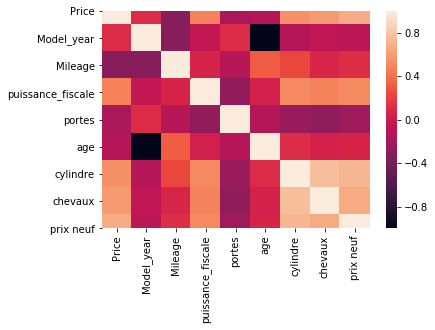

In [103]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df_temp.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [104]:
len(df_temp.dropna())/len(df_temp)
# if we drop the null values we still have 98 % of the dataset

0.9887568223165555

In [105]:
df_temp = df_temp.dropna()

In [106]:
#now we need to categorize the columns Make Model Fuel Gearbox

In [107]:
df_temp['Make'] = df_temp['Make'].astype('category').cat.codes

In [108]:
df_temp['Model'] = df_temp['Model'].astype('category').cat.codes

In [109]:
df_temp['Fuel'] = df_temp['Fuel'].astype('category').cat.codes

In [110]:
df_temp['Gearbox'] = df_temp['Gearbox'].astype('category').cat.codes

In [111]:
# now that we have converted our categorical columns we can now start our model. We have agreed that we would do a random forest

In [112]:
df_temp.columns

Index(['Price', 'Make', 'Model', 'Model_year', 'Mileage', 'Fuel', 'Gearbox',
       'puissance_fiscale', 'portes', 'age', 'cylindre', 'chevaux',
       'prix neuf'],
      dtype='object')

In [113]:
df_temp.to_csv(r'/Users/antoinecabon/Desktop/car_price_prediction/df_temp.csv',index=False)

In [114]:
X = df_temp[['Make', 'Model', 'Model_year', 'Mileage', 'Fuel', 'Gearbox',
       'puissance_fiscale', 'portes', 'age', 'cylindre', 'chevaux', 'prix neuf']]
y = df_temp['Price']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

randomForestRegressor = RandomForestRegressor(n_estimators=500)
randomForestRegressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [118]:
preds = randomForestRegressor.predict(X_test)

In [119]:
preds

array([17683.862, 14672.74 , 14845.338, ...,  9652.61 , 20857.17 ,
       12840.456])

In [120]:
df_preds = pd.DataFrame({'y_test': y_test,'preds': preds})

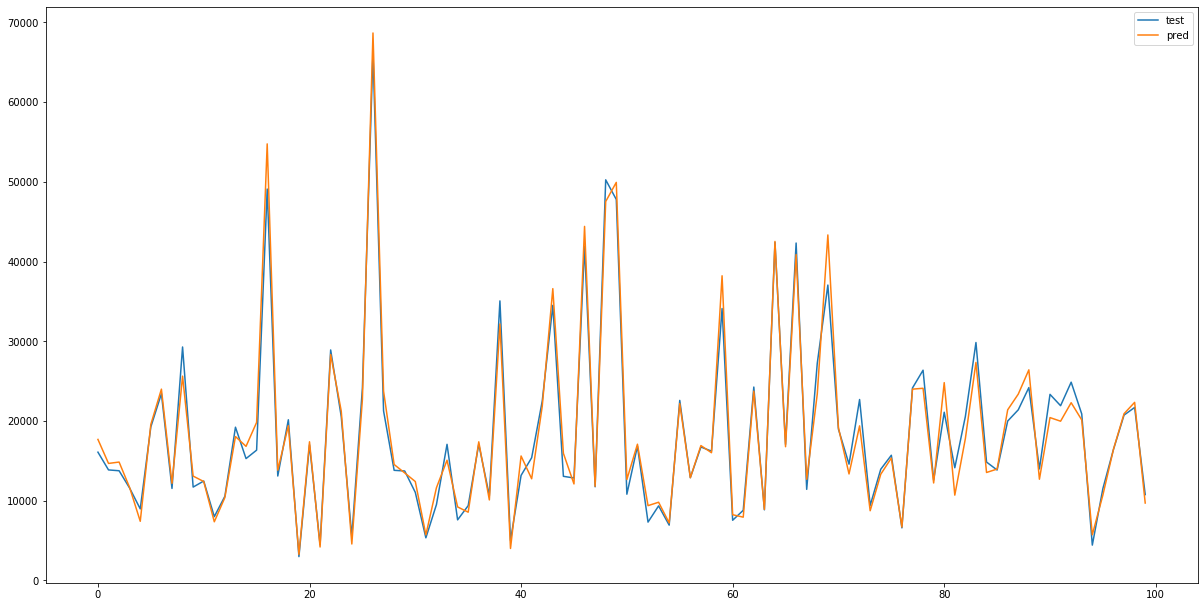

<Figure size 4320x4320 with 0 Axes>

In [121]:
fig= plt.figure(figsize=(20,10))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
plt.plot(df_preds.reset_index()['y_test'][:100], label='test')
plt.plot(df_preds.reset_index()['preds'][:100], label='pred')
plt.figure(figsize=(60,60)) 
axes.legend()
plt.show()

In [123]:
preds = pd.DataFrame(pred)

r2_score(df_preds['y_test'], df_preds['preds'])

0.872851166986069

In [124]:
np.mean(np.abs((df_preds['y_test'] - df_preds['preds']) / df_preds['y_test'])) * 100

37.940144463520966

In [125]:
#let's try to include the word2vec and include only the y_test x_test
len(new_df)

164900

In [126]:
new_df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,puissance_fiscale,portes,version,couleur,options,age,cylindre,chevaux,index,prix neuf
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,2018-07-06 03:47:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...,4,1.600000,92.0,0,26200.0
1,10352.0,PEUGEOT,308,2014,117136,Diesel,mécanique,2018-04-20 13:20:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...,4,1.600000,92.0,0,26200.0
2,11446.0,PEUGEOT,308,2014,93781,Diesel,mécanique,2018-07-16 03:33:00,4,5.0,1.6 HDI FAP 92CH BUSINESS 5P,blanc banquise,banquette arrière 3 places;volant cuir;cache ...,4,1.600000,92.0,0,26200.0
3,57526.0,BMW,X6,2015,39051,Diesel,automatique,2018-04-03 16:41:00,16,5.0,(F16) XDRIVE30D 258 M SPORT BVA8,carbonschwarz metallise,triangle de presignalisation et trousse de pr...,3,2.120257,258.0,1,85150.0
4,54493.0,BMW,X6,2015,64656,Diesel,automatique,2018-07-11 09:44:00,16,5.0,(F16) XDRIVE30D 258 M SPORT BVA8,alpinweiss uni,triangle de presignalisation et trousse de pr...,3,2.120257,258.0,1,85150.0


In [127]:
df = pd.read_csv('new_df.csv')

In [128]:
len(df)

164900

In [129]:
# la partie LMP

In [130]:
# la transformation PCA s'appliquera sur la sortie des countvecorizer concaténées 
# les fonctions de préprocessing

In [131]:
# faire ça pour version et options et ensuite appliquer la PCA et le mettre dans le modèle

In [132]:
def clean_txt_version(df):
    df['version'] = df['version'].str.replace('<br />', '')\
    .apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))\
    .apply(lambda x: ' '.join(x.split()))\
    .str.lstrip()\
    .str.strip()\
    .str.lower()
    
    return df

def clean_txt_options(df):
    df['options'] = df['options'].str.replace('<br />', '')\
    .apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))\
    .apply(lambda x: ' '.join(x.split()))\
    .str.lstrip()\
    .str.strip()\
    .str.lower()
    
    return df

In [133]:
df = clean_txt_version(df)

In [134]:
df = clean_txt_options(df)

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

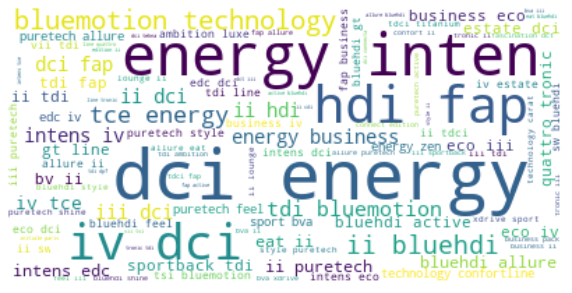

In [136]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(list(df['version'])))
plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

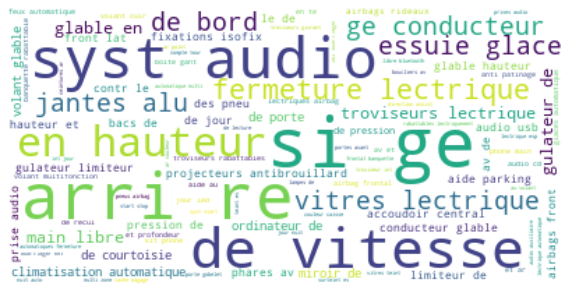

In [137]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(list(df['options'])))
plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [138]:
from nltk.stem import WordNetLemmatizer

In [139]:
from nltk import word_tokenize
from nltk.corpus import stopwords

In [140]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("french")) 

In [141]:
def clean_review(raw_review: str) -> str:
    
    raw_review = ''.join([i for i in raw_review if not i.isdigit()])
    raw_review = raw_review.replace('<br />', '')
    raw_review = re.sub('[^A-Za-z]+', ' ', raw_review)
    raw_review = ' '.join(raw_review.split())
    raw_review = raw_review.lstrip()\
    .rstrip()\
    .lower()
    
    return raw_review

def lemmatize(tokens: list) -> list:
    # 1. Lemmatize
    tokens = list(map(lemmatizer.lemmatize, tokens))
    lemmatized_tokens = list(map(lambda x: lemmatizer.lemmatize(x, "v"), tokens))
    # 2. Remove stop words
    meaningful_words = list(filter(lambda x: not x in stop_words, lemmatized_tokens))
    return meaningful_words

def preprocess(review: str, total: int, show_progress: bool = True) -> list:
    if show_progress:
        global counter
        counter += 1
        print('Processing... %6i/%6i'% (counter, total), end='\r')
    # 1. Clean text
    review = clean_review(review)
    # 2. Split into individual words
    tokens = word_tokenize(review)
    # 3. Lemmatize
    lemmas = lemmatize(tokens)
    # 4. Join the words back into one string separated by space,
    # and return the result.
    return ' '.join(lemmas)

In [142]:
counter = 0
corpus = np.array(list(map(lambda x: preprocess(x, len(df['version'])), df['version'])))

In [143]:
len(df)

164900

In [144]:
clf = CountVectorizer()

In [145]:
X_desc = clf.fit_transform(list(corpus))

In [146]:

df_version = pd.DataFrame(X_desc.todense()) #se rappelle de la taille format spars sotkcer la position des 1

In [147]:
#let's verify that we have the countVectorizer is counting the right number of words
df_version.head()

,0,1,2,3,4,5,6,7,8,9,...,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
len(df['version'])

164900

In [149]:
counter = 0
corpus = np.array(list(map(lambda x: preprocess(x, len(df['options'])), df['options'])))

In [150]:
vectorizer = CountVectorizer()
X_desc = vectorizer.fit_transform(corpus)

In [151]:
df_options = pd.DataFrame(X_desc.todense())

In [152]:
df_options.head()

,0,1,2,3,4,5,6,7,8,9,...,11494,11495,11496,11497,11498,11499,11500,11501,11502,11503
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [153]:
len(df_options)

164900

In [154]:
X = df_version.values

In [155]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [156]:
pca = PCA(n_components=0.99, whiten=True)

In [157]:
X_pca = pca.fit_transform(X)

In [158]:
print('Original number of features:', X.shape[1])

Original number of features: 1941


In [159]:
print('Reduced number of features:', X_pca.shape[1])

Reduced number of features: 573


In [160]:
df_version = pd.DataFrame(X_pca)

In [161]:
df = pd.concat([df_version, df], axis=1)

In [162]:
df = df.drop(columns= ['couleur', 'version', 'options', 'Online']).head()

In [163]:
df_version.head()

,0,1,2,3,4,5,6,7,8,9,...,563,564,565,566,567,568,569,570,571,572
0,-0.292861,-0.256806,2.649791,2.107988,-1.094041,1.474070,1.090542,0.307135,1.328876,0.732053,...,-0.037931,0.060177,0.015876,-0.026115,-0.09039,-0.077225,0.061666,0.021131,0.098959,0.149565
1,-0.292861,-0.256806,2.649791,2.107988,-1.094041,1.474070,1.090542,0.307135,1.328876,0.732053,...,-0.037931,0.060177,0.015876,-0.026115,-0.09039,-0.077225,0.061666,0.021131,0.098959,0.149565
2,-0.292861,-0.256806,2.649791,2.107988,-1.094041,1.474070,1.090542,0.307135,1.328876,0.732053,...,-0.037931,0.060177,0.015876,-0.026115,-0.09039,-0.077225,0.061666,0.021131,0.098959,0.149565
3,-0.325157,-0.650946,0.327772,-1.007867,-0.831461,-0.650109,-1.878560,1.518626,0.883758,-2.254785,...,-0.006522,-0.015471,-0.041134,-0.008519,0.01516,0.003173,-0.087870,-0.010397,0.014254,0.013605
4,-0.325157,-0.650946,0.327772,-1.007867,-0.831461,-0.650109,-1.878560,1.518626,0.883758,-2.254785,...,-0.006522,-0.015471,-0.041134,-0.008519,0.01516,0.003173,-0.087870,-0.010397,0.014254,0.013605


In [164]:
def outliers(df):

    # Remove outliers
    df.drop(df[(df['Price'] == 1)].index, inplace=True)
    df.drop(df[(df['Price'] > 400000)].index, inplace=True) 
    df.drop(df[(df['Model_year'] > 2020)].index, inplace=True)
    df.drop(df[(df['Mileage'] > 400000)].index, inplace=True) 
    df.drop(df[(df['age'] < 0)].index, inplace=True) 
    df.drop(df[(df['portes'] == 0.0)].index, inplace=True)

    return df

In [165]:
#let's remove some of the outliers
df = outliers(df)

In [166]:
df['Make'] = df['Make'].astype('category').cat.codes
df['Model'] = df['Model'].astype('category').cat.codes
df['Fuel'] = df['Fuel'].astype('category').cat.codes
df['Gearbox'] = df['Gearbox'].astype('category').cat.codes

In [167]:
df = df.dropna()

In [168]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Price'])
y = df['Price']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [170]:
randomForestRegressor = RandomForestRegressor(n_estimators=500)
randomForestRegressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [171]:
preds = randomForestRegressor.predict(X_test)

In [172]:
df_preds = pd.DataFrame({'y_test': y_test,'preds': preds})

In [173]:
np.mean(np.abs((df_preds['y_test'] - df_preds['preds']) / df_preds['y_test'])) * 100

19.660576219806288

In [174]:
df = pd.read_csv('new_df.csv')

In [175]:
df['Make'] = df['Make'].astype('category').cat.codes
df['Model'] = df['Model'].astype('category').cat.codes
df['Fuel'] = df['Fuel'].astype('category').cat.codes
df['Gearbox'] = df['Gearbox'].astype('category').cat.codes

In [176]:
df = df.dropna()

In [185]:
df = outliers(df)

In [186]:
X = df[['Make', 'Model', 'Model_year', 'Mileage', 'Fuel', 'Gearbox', 'puissance_fiscale', 'portes', 'age', 'cylindre', 'chevaux', 'prix neuf']]
y = df['Price']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [188]:
randomForestRegressor = RandomForestRegressor(n_estimators=500)
randomForestRegressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [189]:
preds = randomForestRegressor.predict(X_test)

In [190]:
df_preds = pd.DataFrame({'y_test': y_test,'preds': preds})

In [191]:
np.mean(np.abs((df_preds['y_test'] - df_preds['preds']) / df_preds['y_test'])) * 100

8.890619064800294